# Visualisation of Fordgo bike system
## by Jayanth

## Investigation Overview

> In this process of analysing and presenting a visualisation of the data of the Ford GoBike System, the attributes that were taken into consideration for this project were common customer behaviors and characteristics, specifically how the attributes like user type, time, gender,duration of usage of bike system and age impacts usage of the Fordgo bike share system.



## Dataset Overview

> Ford GoBike is the Bay Area's bike share system.Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. The system is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.

>As of January 2018, the system had seen nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers.(source:wikipedia)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
aa1 = pd.read_csv('aa_clean.csv')
aa1.head(4)

bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0       96                     NaN         80110            43.0   
1       88                     NaN         78800            96.0   
2     1094                     NaN         45768           245.0   
3     2831                     NaN         62172             5.0   

                                    end_station_name                 end_time  \
0  San Francisco Public Library (Grove St at Hyde...  2018-01-01 15:12:50.245   
1                              Dolores St at 15th St  2018-01-01 13:49:55.617   
2                             Downtown Berkeley BART  2018-01-01 11:28:36.883   
3       Powell St BART Station (Market St at 5th St)  2018-01-01 10:47:23.531   

   member_birth_year member_gender  start_station_id  \
0             1987.0          Male              74.0   
1             1965.0        Female             284.0   
2                NaN           NaN             245.0   
3                NaN           NaN              60.0   

                                  start_station_name               start_time  \
0                              Laguna St at Hayes St  2017-12-31 16:57:39.654   
1  Yerba Buena Center for the Arts (Howard St at ...  2017-12-31 15:56:34.842   
2                             Downtown Berkeley BART  2017-12-31 22:45:48.411   
3                               8th St at Ringold St  2017-12-31 17:31:10.636   

  user_type  month_num  member_age     month  day weekday  hour  endhour  \
0  Customer         12        32.0  December   31     Sun    16       15   
1  Customer         12        54.0  December   31     Sun    15       13   
2  Customer         12         NaN  December   31     Sun    22       11   
3  Customer         12         NaN  December   31     Sun    17       10   

   duration_min  
0          1335  
1          1313  
2           762  
3          1036

## Fordgo bike system users by type
>1)from the graph, it can be seen that users of fordgo bike include more number of subscriber (88.46 percent) than the customers(11.54 percent).

>2) it can be assumed that more number of people are subscribing to the service as it more convienent and easy to use as this bike system is their main part of their transport in the day to day lifes

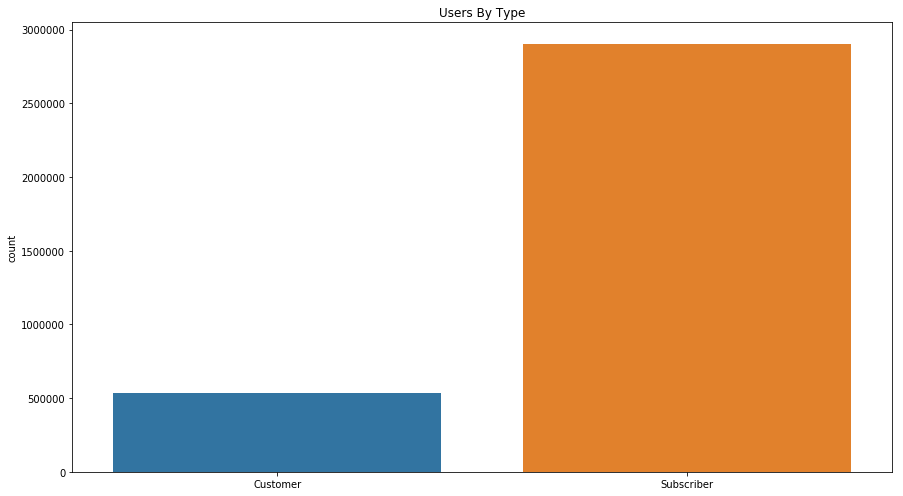

In [3]:
fig, ax = plt.subplots(figsize = (14.70, 8.27))
sb.countplot(x = "user_type", data = aa1, lw = 0.5)
plt.title("Users By Type");
plt.xlabel("");

## Ford GoBike system's Usage by Month.

> From the graph it can be observed that the months of march, april and may have the highest usage of bikes and the month of june has the lowest usage when compared to all the other months.

<Figure size 1058.4x595.44 with 0 Axes>

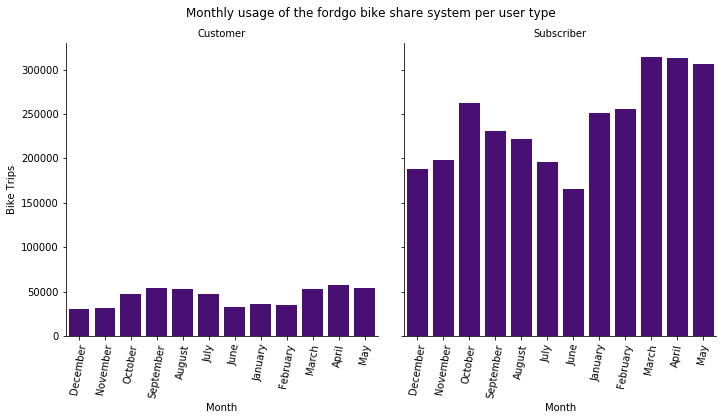

In [4]:

plt.figure(figsize=(14.70, 8.27))
g = sb.catplot(data=aa1, x='month', col="user_type", kind='count',color = "indigo")
g.set_axis_labels("Month", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the fordgo bike share system per user type', y=1.03)
g.set_xticklabels(rotation=80);

## Fordgo bike system relative frequency of bike trips during the week
>1)From the graph it can be observed that thursday,friday and saturday have the same frequency

>2) monday has the lowest frequency.this shows that the usage of bikes is more during the end of the week than the begining of the week.


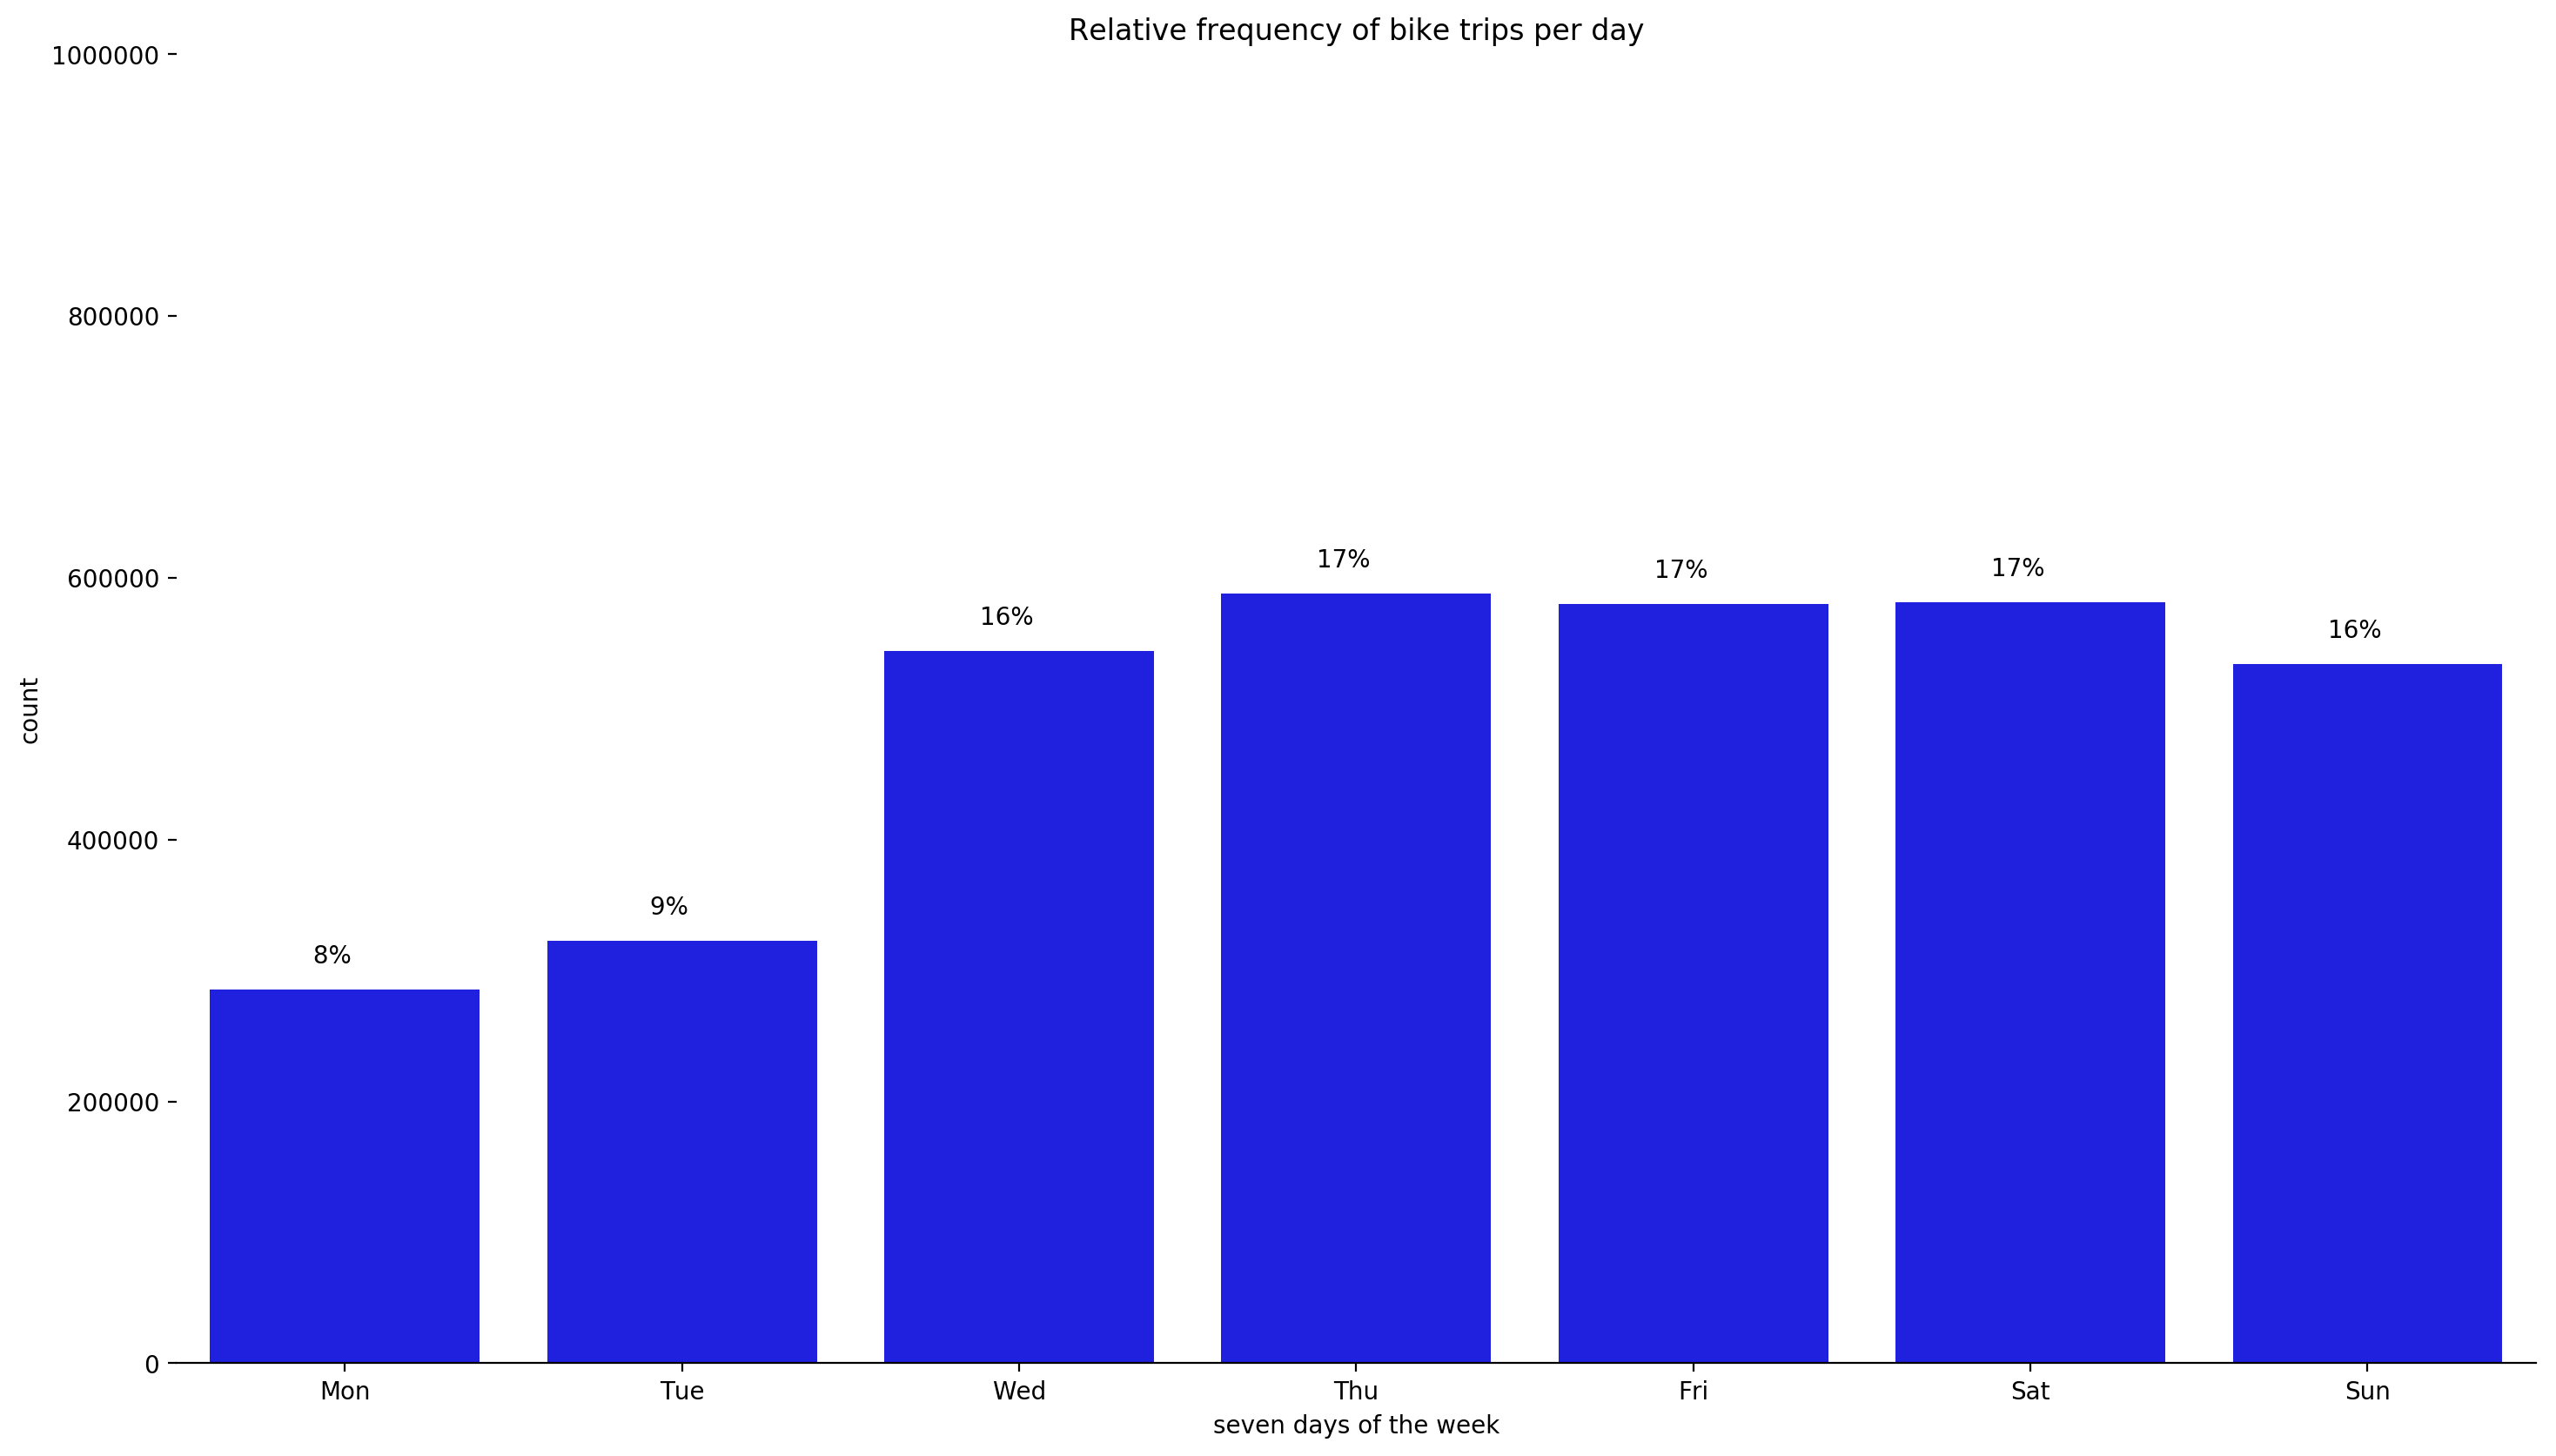

In [5]:
fig, ax = plt.subplots(figsize = (14.70, 8.27),dpi=200)
sb.countplot(x = "weekday", data = aa1, color = "blue");
plt.tight_layout()
c_axes = plt.gca()
c_axes.axes.get_yaxis().set_visible(True)
sb.despine(fig, left = True)
plt.title("Relative frequency of bike trips per day")
ax.set(xticklabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);
plt.xlabel("seven days of the week")
plt.ylim(0,1000000)
for p in ax.patches:
    ax.annotate('{:10.0f}%'.format(p.get_height()/len(aa1)*100), (p.get_x()+0.1, p.get_height()+20000))

## Fordgo bike system members gender
>from the pie chart it can be observed that the usage of the bike is done more by males when compared to females and others

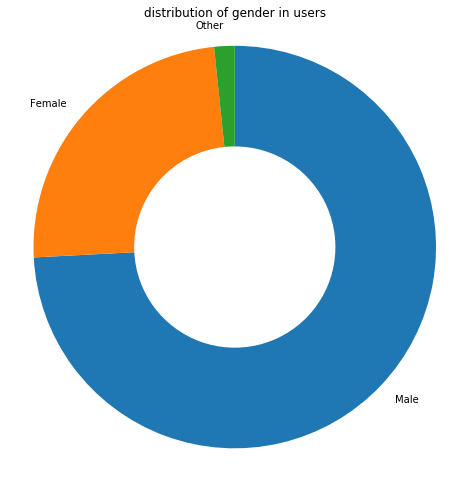

In [6]:
plt.figure(figsize=(14.70, 8.27))
sorted_counts = aa1['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False,radius=100,wedgeprops = {'width' : 50})
plt.title("distribution of gender in users")
plt.axis('square');

## Ford Go Bike System - Duration (Min) by User Type
>1) Customer typically have trip durations are longer (8 to 18 minutes) than for subscribers (5 to 12 minutes).

>2)This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips.

In [7]:
plt.figure(figsize=(14.70, 8.27))
bin_edges = np.arange(0, 45, 1) 
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45] 
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = aa1, x = 'duration_min', bins = bin_edges)
sb.distplot(aa1['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});
plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05) 
plt.xlabel('Duration (Min)') 
plt.xticks(ticks, labels) 
plt.ylabel('Number of Bike Trips');

## Ford GoBike System Trends by User Type
>1)The graph below shows exactly the sharp contrast between Customers and Subscribers.

>2) Customers have a relatively low usage of the bike share system with a small increase on the weekends

>3) Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

In [8]:
plt.figure(figsize=(14.70, 8.27))
aa_user_week = aa1.groupby(['weekday', 'user_type']).size().reset_index() 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.pointplot(data=aa_user_week, x='weekday', y=0,hue = 'user_type',order = weekday)
plt.title('Ford GoBike System Trends by User Type', y=1.05) 
plt.xlabel('Weekdays') 
plt.ylabel('Number of Bike Trips') 
plt.grid();

## Fordgo bike system bike rides per hour of the day
>from the graph it can be observed that the usage of bike is peak between 8 am and 9 am and also between 5pm and 6 pm

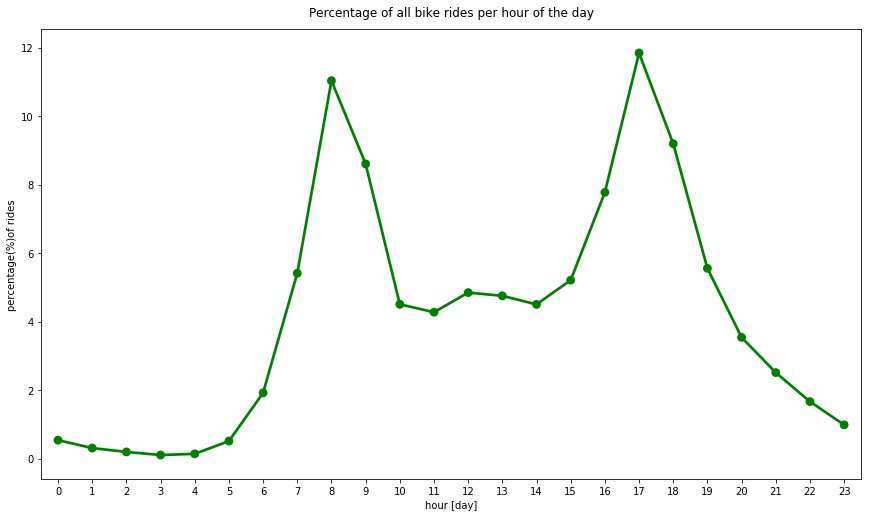

In [9]:
plt.figure(figsize=(14.70, 8.27))
trip_per_hour = aa1.groupby('hour').agg({'bike_id':'count'}).reset_index()
trip_per_hour['bike_id'] = (trip_per_hour['bike_id']/trip_per_hour['bike_id'].sum())*100
sb.pointplot(x='hour', y='bike_id',color='green',data=trip_per_hour) 
plt.title('Percentage of all bike rides per hour of the day',y=1.015) 
plt.xlabel('hour [day]')
plt.ylabel('percentage(%)of rides');

## Ford GoBike System - Summary

>There are two types of clients using the Fordgo bike system:
>>1)Subscribers
>>2) Customers.

>2) Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm.

>3) Customers are usually occasional riders who use the system mainly on weekends to explore the Bay Area.

>4) Age is also a factor within user type.



>5) Subscribers who fall in the age group between 26-35 years old are the most common age group to use the bike sharing system.

>6) Customers who use the bike system more when compared to other age groups in customers are a little older than the subscribers.

>7) The 26-35 years old also lead the spike which occurs across all age groups in October.

>8) Subscribers who fall in the 36-45-year-old age group are the next most common age group to use the bike sharing system and follow a similar trend at the 26-35-year-old.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!